In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
# Select features and target
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

#Train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [48]:
#Model
model = CatBoostClassifier(
    iterations = 200,
    learning_rate = 0.1,
    depth = 6,
    loss_function = 'Logloss',
    verbose = 100
)

In [49]:
# train
model.fit(X_train,y_train)

0:	learn: 0.5690265	total: 2.61ms	remaining: 519ms
100:	learn: 0.0899573	total: 210ms	remaining: 206ms
199:	learn: 0.0443274	total: 408ms	remaining: 0us


In [50]:
y_pred = model.predict(X_test)

In [51]:
probabilities = model.predict_proba(X_test)[:,1]

In [52]:
predict_class = (probabilities > 0.5 ).astype(int)

In [53]:
predict_class

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [54]:
#Model evaluation
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")
print(f"\nConfusion Matrix :\n {confusion_matrix(y_test,y_pred)}")
print(f"\nClassification report: {classification_report(y_test,y_pred)}")

Accuracy Score: 0.8833333333333333

Confusion Matrix :
 [[69  8]
 [ 6 37]]

Classification report:               precision    recall  f1-score   support

           0       0.92      0.90      0.91        77
           1       0.82      0.86      0.84        43

    accuracy                           0.88       120
   macro avg       0.87      0.88      0.87       120
weighted avg       0.88      0.88      0.88       120



In [55]:
#Example
test = pd.DataFrame([{
    'Age' : 42,
    'EstimatedSalary' : 85000}])


model.predict(test)[0]

0

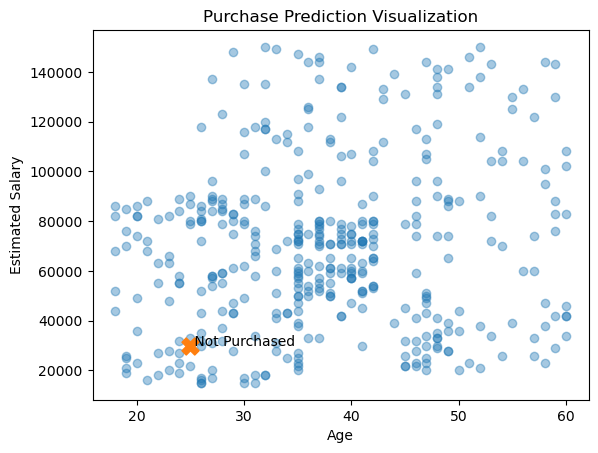

In [56]:
import matplotlib.pyplot as plt

# Plot existing data
plt.scatter(df['Age'], df['EstimatedSalary'], alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.title("Purchase Prediction Visualization")

# Highlight the new user (Not Purchased)
plt.scatter(25, 30000, marker='X', s=150)
plt.text(25, 30000, " Not Purchased", fontsize=10)

plt.show()